# DNN: analysis with Keras of 2D data

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

%run nonlinear_function.py

# training data
perc_train = 0.8

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

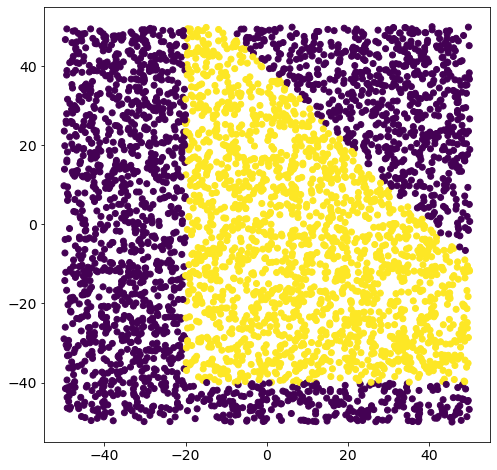

In [2]:
# Keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

### Split training and test data

In [3]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


### Rescale input data

In [4]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

### Define the model with Keras

In [5]:
# reproducibility
np.random.seed(12345)

CASE=1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(3,activation='sigmoid'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
print(model.summary())

2022-03-07 11:51:04.794393: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-07 11:51:04.796196: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 20)                60        
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


### Optimization method and cost function

In [6]:
model.compile(loss='binary_crossentropy',
              #optimizer='RMSprop',
              optimizer='adam',
              metrics=['accuracy'])

### Training

In [7]:
fit = model.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/400
64/64 - 2s - loss: 0.6946 - accuracy: 0.4656 - val_loss: 0.6776 - val_accuracy: 0.5750 - 2s/epoch - 30ms/step
Epoch 2/400
64/64 - 1s - loss: 0.6681 - accuracy: 0.5375 - val_loss: 0.6469 - val_accuracy: 0.5750 - 610ms/epoch - 10ms/step
Epoch 3/400
64/64 - 1s - loss: 0.6331 - accuracy: 0.6122 - val_loss: 0.6007 - val_accuracy: 0.7013 - 616ms/epoch - 10ms/step
Epoch 4/400
64/64 - 1s - loss: 0.5699 - accuracy: 0.7494 - val_loss: 0.5198 - val_accuracy: 0.7875 - 755ms/epoch - 12ms/step
Epoch 5/400
64/64 - 1s - loss: 0.4741 - accuracy: 0.8319 - val_loss: 0.4287 - val_accuracy: 0.8450 - 616ms/epoch - 10ms/step
Epoch 6/400
64/64 - 1s - loss: 0.3986 - accuracy: 0.8616 - val_loss: 0.3635 - val_accuracy: 0.8788 - 701ms/epoch - 11ms/step
Epoch 7/400
64/64 - 1s - loss: 0.3397 - accuracy: 0.8850 - val_loss: 0.3177 - val_accuracy: 0.8988 - 630ms/epoch - 10ms/step
Epoch 8/400
64/64 - 1s - loss: 0.3126 - accuracy: 0.8950 - val_loss: 0.2951 - val_accuracy: 0.9062 - 595ms/epoch - 9ms/step
Epoc

Epoch 67/400
64/64 - 1s - loss: 0.1755 - accuracy: 0.9225 - val_loss: 0.1655 - val_accuracy: 0.9300 - 579ms/epoch - 9ms/step
Epoch 68/400
64/64 - 1s - loss: 0.1735 - accuracy: 0.9231 - val_loss: 0.1642 - val_accuracy: 0.9312 - 685ms/epoch - 11ms/step
Epoch 69/400
64/64 - 1s - loss: 0.1733 - accuracy: 0.9247 - val_loss: 0.1646 - val_accuracy: 0.9287 - 604ms/epoch - 9ms/step
Epoch 70/400
64/64 - 0s - loss: 0.1729 - accuracy: 0.9216 - val_loss: 0.1645 - val_accuracy: 0.9275 - 449ms/epoch - 7ms/step
Epoch 71/400
64/64 - 1s - loss: 0.1708 - accuracy: 0.9234 - val_loss: 0.1667 - val_accuracy: 0.9275 - 529ms/epoch - 8ms/step
Epoch 72/400
64/64 - 1s - loss: 0.1725 - accuracy: 0.9225 - val_loss: 0.1659 - val_accuracy: 0.9262 - 668ms/epoch - 10ms/step
Epoch 73/400
64/64 - 1s - loss: 0.1732 - accuracy: 0.9234 - val_loss: 0.1650 - val_accuracy: 0.9287 - 520ms/epoch - 8ms/step
Epoch 74/400
64/64 - 0s - loss: 0.1703 - accuracy: 0.9244 - val_loss: 0.1635 - val_accuracy: 0.9275 - 417ms/epoch - 7ms/ste

64/64 - 1s - loss: 0.1660 - accuracy: 0.9262 - val_loss: 0.1558 - val_accuracy: 0.9287 - 839ms/epoch - 13ms/step
Epoch 133/400
64/64 - 0s - loss: 0.1650 - accuracy: 0.9234 - val_loss: 0.1577 - val_accuracy: 0.9300 - 465ms/epoch - 7ms/step
Epoch 134/400
64/64 - 1s - loss: 0.1654 - accuracy: 0.9262 - val_loss: 0.1564 - val_accuracy: 0.9300 - 576ms/epoch - 9ms/step
Epoch 135/400
64/64 - 1s - loss: 0.1648 - accuracy: 0.9250 - val_loss: 0.1567 - val_accuracy: 0.9262 - 571ms/epoch - 9ms/step
Epoch 136/400
64/64 - 1s - loss: 0.1654 - accuracy: 0.9250 - val_loss: 0.1573 - val_accuracy: 0.9287 - 546ms/epoch - 9ms/step
Epoch 137/400
64/64 - 0s - loss: 0.1641 - accuracy: 0.9266 - val_loss: 0.1548 - val_accuracy: 0.9287 - 419ms/epoch - 7ms/step
Epoch 138/400
64/64 - 0s - loss: 0.1654 - accuracy: 0.9266 - val_loss: 0.1545 - val_accuracy: 0.9287 - 498ms/epoch - 8ms/step
Epoch 139/400
64/64 - 0s - loss: 0.1635 - accuracy: 0.9256 - val_loss: 0.1548 - val_accuracy: 0.9287 - 481ms/epoch - 8ms/step
Epoch

64/64 - 1s - loss: 0.1645 - accuracy: 0.9253 - val_loss: 0.1525 - val_accuracy: 0.9300 - 665ms/epoch - 10ms/step
Epoch 198/400
64/64 - 1s - loss: 0.1636 - accuracy: 0.9256 - val_loss: 0.1586 - val_accuracy: 0.9225 - 904ms/epoch - 14ms/step
Epoch 199/400
64/64 - 0s - loss: 0.1658 - accuracy: 0.9231 - val_loss: 0.1521 - val_accuracy: 0.9287 - 358ms/epoch - 6ms/step
Epoch 200/400
64/64 - 0s - loss: 0.1632 - accuracy: 0.9269 - val_loss: 0.1524 - val_accuracy: 0.9287 - 370ms/epoch - 6ms/step
Epoch 201/400
64/64 - 0s - loss: 0.1626 - accuracy: 0.9256 - val_loss: 0.1511 - val_accuracy: 0.9287 - 338ms/epoch - 5ms/step
Epoch 202/400
64/64 - 0s - loss: 0.1632 - accuracy: 0.9253 - val_loss: 0.1532 - val_accuracy: 0.9287 - 366ms/epoch - 6ms/step
Epoch 203/400
64/64 - 0s - loss: 0.1639 - accuracy: 0.9253 - val_loss: 0.1511 - val_accuracy: 0.9312 - 318ms/epoch - 5ms/step
Epoch 204/400
64/64 - 0s - loss: 0.1621 - accuracy: 0.9272 - val_loss: 0.1516 - val_accuracy: 0.9287 - 477ms/epoch - 7ms/step
Epoc

64/64 - 1s - loss: 0.1619 - accuracy: 0.9266 - val_loss: 0.1508 - val_accuracy: 0.9300 - 529ms/epoch - 8ms/step
Epoch 263/400
64/64 - 1s - loss: 0.1602 - accuracy: 0.9259 - val_loss: 0.1498 - val_accuracy: 0.9312 - 558ms/epoch - 9ms/step
Epoch 264/400
64/64 - 1s - loss: 0.1625 - accuracy: 0.9259 - val_loss: 0.1485 - val_accuracy: 0.9300 - 517ms/epoch - 8ms/step
Epoch 265/400
64/64 - 0s - loss: 0.1617 - accuracy: 0.9262 - val_loss: 0.1495 - val_accuracy: 0.9287 - 383ms/epoch - 6ms/step
Epoch 266/400
64/64 - 0s - loss: 0.1615 - accuracy: 0.9256 - val_loss: 0.1488 - val_accuracy: 0.9312 - 419ms/epoch - 7ms/step
Epoch 267/400
64/64 - 0s - loss: 0.1622 - accuracy: 0.9262 - val_loss: 0.1499 - val_accuracy: 0.9287 - 386ms/epoch - 6ms/step
Epoch 268/400
64/64 - 1s - loss: 0.1597 - accuracy: 0.9259 - val_loss: 0.1488 - val_accuracy: 0.9300 - 512ms/epoch - 8ms/step
Epoch 269/400
64/64 - 0s - loss: 0.1599 - accuracy: 0.9266 - val_loss: 0.1495 - val_accuracy: 0.9312 - 356ms/epoch - 6ms/step
Epoch 

64/64 - 0s - loss: 0.1621 - accuracy: 0.9259 - val_loss: 0.1477 - val_accuracy: 0.9287 - 480ms/epoch - 8ms/step
Epoch 328/400
64/64 - 0s - loss: 0.1615 - accuracy: 0.9253 - val_loss: 0.1486 - val_accuracy: 0.9312 - 437ms/epoch - 7ms/step
Epoch 329/400
64/64 - 0s - loss: 0.1610 - accuracy: 0.9266 - val_loss: 0.1479 - val_accuracy: 0.9287 - 336ms/epoch - 5ms/step
Epoch 330/400
64/64 - 0s - loss: 0.1581 - accuracy: 0.9278 - val_loss: 0.1476 - val_accuracy: 0.9300 - 381ms/epoch - 6ms/step
Epoch 331/400
64/64 - 0s - loss: 0.1618 - accuracy: 0.9250 - val_loss: 0.1471 - val_accuracy: 0.9287 - 334ms/epoch - 5ms/step
Epoch 332/400
64/64 - 0s - loss: 0.1612 - accuracy: 0.9269 - val_loss: 0.1474 - val_accuracy: 0.9312 - 372ms/epoch - 6ms/step
Epoch 333/400
64/64 - 0s - loss: 0.1603 - accuracy: 0.9259 - val_loss: 0.1513 - val_accuracy: 0.9275 - 407ms/epoch - 6ms/step
Epoch 334/400
64/64 - 0s - loss: 0.1617 - accuracy: 0.9259 - val_loss: 0.1469 - val_accuracy: 0.9312 - 423ms/epoch - 7ms/step
Epoch 

64/64 - 0s - loss: 0.1593 - accuracy: 0.9272 - val_loss: 0.1470 - val_accuracy: 0.9300 - 461ms/epoch - 7ms/step
Epoch 393/400
64/64 - 0s - loss: 0.1597 - accuracy: 0.9259 - val_loss: 0.1472 - val_accuracy: 0.9300 - 328ms/epoch - 5ms/step
Epoch 394/400
64/64 - 0s - loss: 0.1587 - accuracy: 0.9266 - val_loss: 0.1465 - val_accuracy: 0.9312 - 452ms/epoch - 7ms/step
Epoch 395/400
64/64 - 0s - loss: 0.1595 - accuracy: 0.9266 - val_loss: 0.1460 - val_accuracy: 0.9300 - 445ms/epoch - 7ms/step
Epoch 396/400
64/64 - 0s - loss: 0.1583 - accuracy: 0.9269 - val_loss: 0.1454 - val_accuracy: 0.9312 - 476ms/epoch - 7ms/step
Epoch 397/400
64/64 - 0s - loss: 0.1589 - accuracy: 0.9269 - val_loss: 0.1455 - val_accuracy: 0.9300 - 389ms/epoch - 6ms/step
Epoch 398/400
64/64 - 0s - loss: 0.1580 - accuracy: 0.9272 - val_loss: 0.1491 - val_accuracy: 0.9287 - 426ms/epoch - 7ms/step
Epoch 399/400
64/64 - 0s - loss: 0.1590 - accuracy: 0.9266 - val_loss: 0.1476 - val_accuracy: 0.9287 - 362ms/epoch - 6ms/step
Epoch 

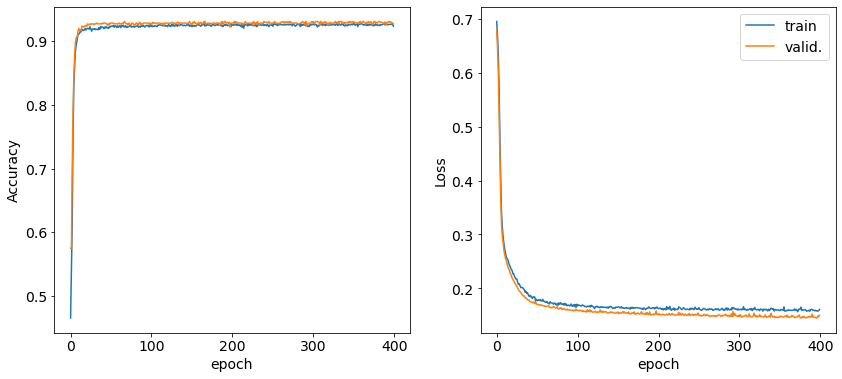

In [8]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [9]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model.predict(grid_r)

51 2601
[50. 50.]


<function matplotlib.pyplot.show(close=None, block=None)>

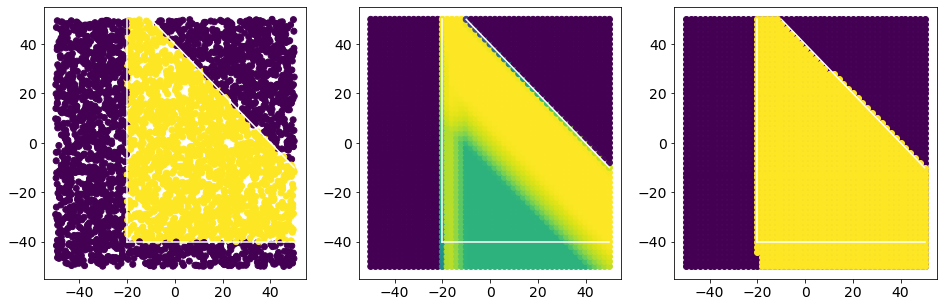

In [10]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.show